In this notebook we use GCN to analyze the POIs networks

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd drive/MyDrive/Colab\ Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
import numpy as np
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import math
from collections import Counter
import random
import csv
import os
import sys
import random

In [ ]:
random.seed(10)

In [ ]:
df = pd.read_csv('./datasets/gentrification_labels.csv')

In [ ]:
df.tail(10)

,GEOID,label,the_geom,STATEFP10,COUNTYFP10,TRACTCE10,NAME10,NAMELSAD10,INTPTLAT,INTPTLONG,long+,long-,lat+,lat-
791,17031843200,1,MULTIPOLYGON (((-87.65045099997508 41.85258499...,17,31,843200,8432.0,Census Tract 8432,41.848715,-87.664217,-87.660597,-87.667837,41.851420,41.846010
792,17031843300,1,MULTIPOLYGON (((-87.68821699998962 41.85933700...,17,31,843300,8433.0,Census Tract 8433,41.863764,-87.692550,-87.688930,-87.696170,41.866469,41.861059
793,17031843400,1,MULTIPOLYGON (((-87.72356499996559 41.85156999...,17,31,843400,8434.0,Census Tract 8434,41.849327,-87.732022,-87.728402,-87.735642,41.852032,41.846622
794,17031843500,1,MULTIPOLYGON (((-87.6927909999821 41.844721999...,17,31,843500,8435.0,Census Tract 8435,41.840983,-87.697566,-87.693946,-87.701186,41.843688,41.838278
795,17031843600,0,MULTIPOLYGON (((-87.61128600000754 41.80216899...,17,31,843600,8436.0,Census Tract 8436,41.806765,-87.608949,-87.605329,-87.612569,41.809470,41.804060
796,17031843700,0,MULTIPOLYGON (((-87.69666899996376 41.94854100...,17,31,843700,8437.0,Census Tract 8437,41.945560,-87.690034,-87.686414,-87.693654,41.948265,41.942855
797,17031843800,0,MULTIPOLYGON (((-87.6451599999826 41.794302000...,17,31,843800,8438.0,Census Tract 8438,41.801657,-87.640476,-87.636856,-87.644096,41.804362,41.798952
798,17031843900,0,MULTIPOLYGON (((-87.55868599996295 41.77379199...,17,31,843900,8439.0,Census Tract 8439,41.778993,-87.576130,-87.572510,-87.579750,41.781698,41.776288
799,17031980000,0,MULTIPOLYGON (((-87.92062799997296 42.00453199...,17,31,980000,9800.0,Census Tract 9800,41.979419,-87.902438,-87.898818,-87.906058,41.982124,41.976714
800,17031980100,0,MULTIPOLYGON (((-87.73789600001243 41.78578500...,17,31,980100,9801.0,Census Tract 9801,41.785981,-87.750900,-87.747280,-87.754520,41.788686,41.783276


In [ ]:
ids = df['GEOID']
labels = df['label']
lats = df['INTPTLAT']
longs = df['INTPTLONG']

In [ ]:
chi_lat_n = 42.05
chi_lat_s = 41.7
chi_long_w = -87.9
chi_long_e = -87.53

In [ ]:
tracts = pd.DataFrame(list(zip(ids, lats, longs, labels)))
tracts.columns = ['id', 'lat', 'long', 'label']

In [ ]:
tracts.describe()

,id,lat,long,label
count,8.010000e+02,801.000000,801.000000,801.000000
mean,1.703141e+10,41.859390,-87.677877,0.197253
std,2.779699e+05,0.089801,0.059513,0.398174
min,1.703101e+10,41.650720,-87.907497,0.000000
25%,1.703116e+10,41.783596,-87.715068,0.000000
50%,1.703135e+10,41.871619,-87.673322,0.000000
75%,1.703167e+10,41.935114,-87.638807,0.000000
max,1.703198e+10,42.021256,-87.529432,1.000000


In [ ]:
tracts.tail(10)

,id,lat,long,label
791,17031843200,41.848715,-87.664217,1
792,17031843300,41.863764,-87.692550,1
793,17031843400,41.849327,-87.732022,1
794,17031843500,41.840983,-87.697566,1
795,17031843600,41.806765,-87.608949,0
796,17031843700,41.945560,-87.690034,0
797,17031843800,41.801657,-87.640476,0
798,17031843900,41.778993,-87.576130,0
799,17031980000,41.979419,-87.902438,0
800,17031980100,41.785981,-87.750900,0


In [ ]:
for index, row in tracts.iterrows():
    if (row['lat'] > chi_lat_n or row['lat'] < chi_lat_s or
            row['long'] > chi_long_e or row['long'] < chi_long_w):
        tracts = tracts.drop([index])

In [ ]:
city_graph = nx.Graph()
color_map = []
for index, row in tracts.iterrows():
    city_graph.add_node((row['long'], row['lat']),
                        pos=(row['long'], row['lat']),
                        label=row['label'])
    if row['label'] == 1:
        color_map.append('purple')
    else:
        color_map.append('lightblue')

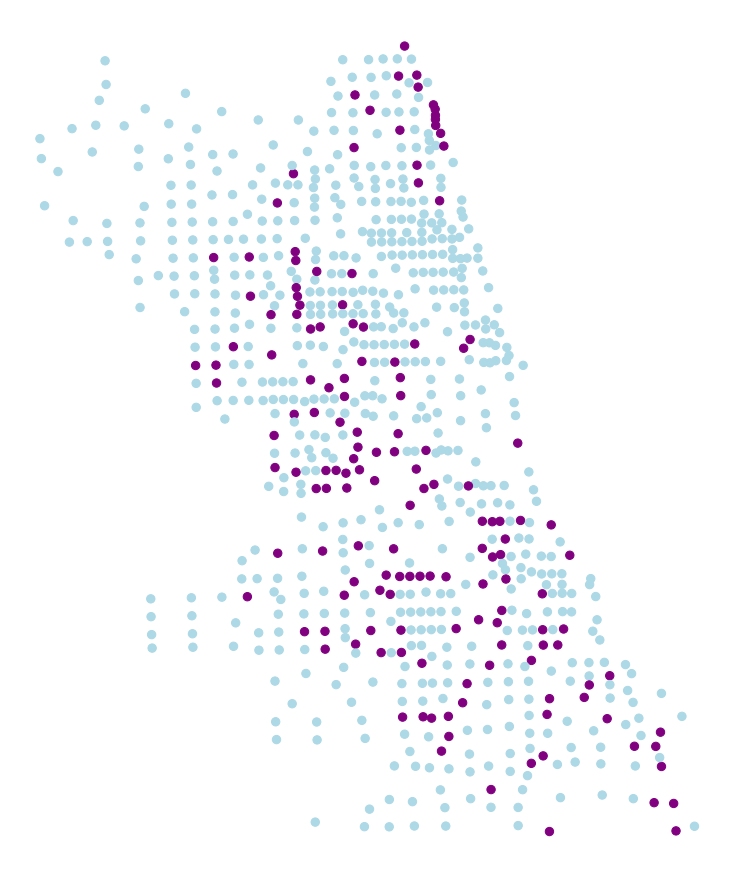

In [ ]:
plt.figure(figsize=(10, 12))

pos=nx.get_node_attributes(city_graph,'pos')
nx.draw(city_graph, pos=pos,
        node_color=color_map, 
        with_labels=False,
        node_size=70)

In [ ]:
pip install pykml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 41 kB 108 kB/s 


In [ ]:
from pykml import parser

In [ ]:
h_lat_n = 42.05
h_lat_s = 41.7
h_long_w = -87.82
h_long_e = -87.53

In [ ]:
def get_distance(p1, p2):
    dist = math.sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)
    return dist

In [ ]:
filepath = './datasets/kmlHospitals.kml'
with open(filepath) as fobj:
    folder = parser.parse(fobj).getroot().Document.Folder

hospitals = []
for pm in folder.Placemark:
    coordinates = pm.Point.coordinates
    longitude = float(str(coordinates)[0:11])
    latitude = float(str(coordinates)[12:21])
    if ((latitude > h_lat_s and latitude < h_lat_n) and
            (longitude > h_long_w and longitude < h_long_e)):
        hospitals.append([longitude, latitude, 0])

In [ ]:
for i, hospital in enumerate(hospitals):
    closest_distance = 1000000
    for index, row in tracts.iterrows():
        dist = get_distance((row['long'], row['lat']),
                            (hospital[0], hospital[1]))
        if dist < closest_distance:
            closest_distance = dist
            label = row['label']
    hospitals[i][2] = int(label)

In [ ]:
filepath = './datasets/CTA_RailStations.kml'
with open(filepath) as fobj:
    folder = parser.parse(fobj).getroot().Document.Folder

cta = []
for pm in folder.Placemark:
    coordinates = str(pm.Point.coordinates).split(',')
    longitude = float(coordinates[0])
    latitude = float(coordinates[1])
    if ((latitude > h_lat_s and latitude < h_lat_n) and
            (longitude > h_long_w and longitude < h_long_e)):
        cta.append([longitude, latitude, 0])

In [ ]:
for i, station in enumerate(cta):
    closest_distance = 1000000
    for index, row in tracts.iterrows():
        dist = get_distance((row['long'], row['lat']),
                            (station[0], station[1]))
        if dist < closest_distance:
            closest_distance = dist
            label = row['label']
    cta[i][2] = int(label)

In [ ]:
filepath = './datasets/kmlPrivateSchools.kml'
with open(filepath) as fobj:
    folder = parser.parse(fobj).getroot().Document.Folder

private_schools = []
for pm in folder.Placemark:
    coordinates = pm.Point.coordinates
    longitude = float(str(coordinates)[0:11])
    latitude = float(str(coordinates)[12:21])
    if ((latitude > h_lat_s and latitude < h_lat_n) and
            (longitude > h_long_w and longitude < h_long_e)):
        private_schools.append([longitude, latitude, 0])

In [ ]:
filepath = './datasets/kmlPublicSchools.kml'
with open(filepath) as fobj:
    folder = parser.parse(fobj).getroot().Document.Folder

public_schools = []
for pm in folder.Placemark:
    coordinates = pm.Point.coordinates
    longitude = float(str(coordinates)[0:11])
    latitude = float(str(coordinates)[12:21])
    if ((latitude > h_lat_s and latitude < h_lat_n) and
            (longitude > h_long_w and longitude < h_long_e)):
        public_schools.append([longitude, latitude, 0])

In [ ]:
all_schools = public_schools + private_schools

In [ ]:
for i, school in enumerate(all_schools):
    closest_distance = 1000000
    for index, row in tracts.iterrows():
        dist = get_distance((row['long'], row['lat']),
                            (school[0], school[1]))
        if dist < closest_distance:
            closest_distance = dist
            label = row['label']
    all_schools[i][2] = int(label)

In [ ]:
tract_lats = tracts['lat'].tolist()
tract_longs = tracts['long'].tolist()
tract_labels = tracts['label'].tolist()

In [ ]:
# Remove the components you are interested in seeing
all_nodes = list(zip(tract_longs, tract_lats, tract_labels)) + hospitals + cta + all_schools

In [ ]:
tract_indices = list(range(0, len(tracts)))
all_indices = list(range(0, len(all_nodes)))
hospital_indices = list(range(len(tracts), len(tracts) + len(hospitals)))
cta_indices = list(range(len(tracts) + len(hospitals), len(tracts) + len(hospitals) + len(cta)))
school_indices = list(range(len(tracts) + len(hospitals) + len(cta), len(tracts) + len(hospitals) + len(cta) + len(all_schools)))

In [ ]:
len(hospitals), len(hospital_indices)

(48, 48)

In [ ]:
# Creating a graph using NetworkX

# Adding nodes
city_graph = nx.Graph()
color_map = []
for i, values in enumerate(all_nodes):
    n_long, n_lat, n_label = values

    city_graph.add_node(i, pos=(n_long, n_lat))

    if n_label == 1:
        color_map.append('steelblue')
    else:
        color_map.append('lightblue')

# Adding edges
# Each node is directly connected to its closest four neighbors
for i in all_indices:
    proximity_dict = {}
    for j in all_indices:
        if i != j:
            proximity_dict[j] = get_distance((all_nodes[i][0], all_nodes[i][1]),
                                             (all_nodes[j][0], all_nodes[j][1]))
    
    closest4 = sorted(proximity_dict, key=proximity_dict.get, reverse=False)[0:4]
    
    for neighbor in closest4:
        s_lat = all_nodes[neighbor][1]
        s_long = all_nodes[neighbor][0]
        distance = get_distance((all_nodes[i][0], all_nodes[i][1]),
                                (s_long, s_lat))
        city_graph.add_edge(i, neighbor, weight=distance)


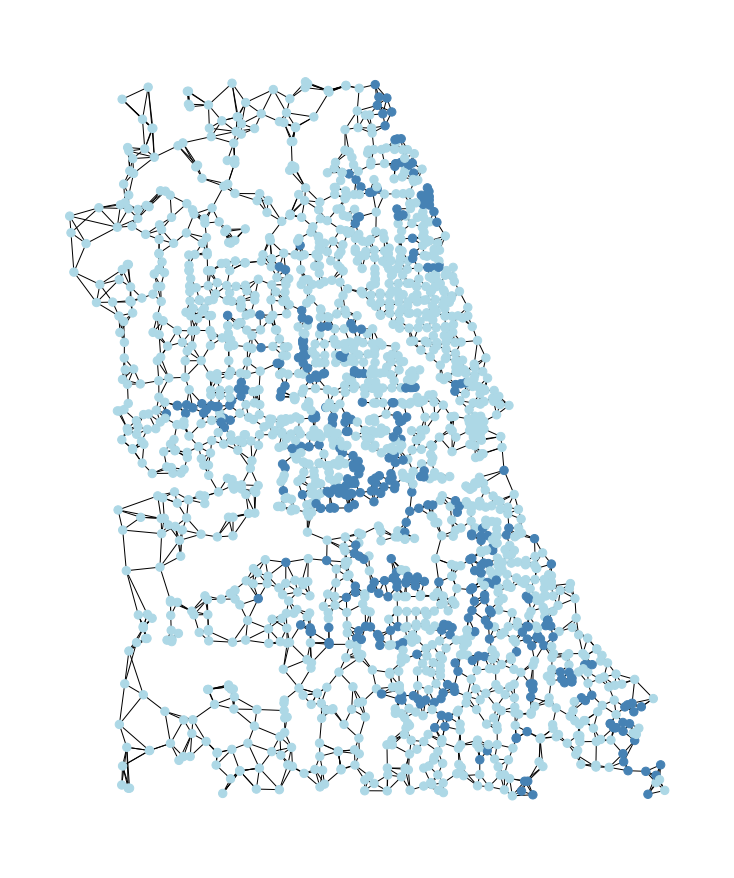

In [ ]:
plt.figure(figsize=(10, 12))

pos=nx.get_node_attributes(city_graph,'pos')
nx.draw(city_graph, pos=pos,
        node_color=color_map, 
        with_labels=False,
        node_size=70)

In [ ]:
tracts

,id,lat,long,label
0,17031010100,42.021256,-87.669832,1
1,17031010201,42.016008,-87.680148,0
2,17031010202,42.016051,-87.673322,0
3,17031010300,42.015941,-87.666535,0
4,17031010400,42.006411,-87.658816,0
...,...,...,...,...
795,17031843600,41.806765,-87.608949,0
796,17031843700,41.945560,-87.690034,0
797,17031843800,41.801657,-87.640476,0
798,17031843900,41.778993,-87.576130,0


In [ ]:
nx.shortest_path_length(city_graph, source=tract_indices[10], target=hospital_indices[10])

31

In [ ]:
hospital_paths = {}

for tract in tract_indices:
    hospitals_dict = {}
    for hospital in hospital_indices:
        if nx.has_path(city_graph, source=tract, target=hospital):
            hospitals_dict[hospital] = nx.shortest_path_length(city_graph,
                                                               source=tract,
                                                               target=hospital)
        else:
            hospitals_dict[hospital] = 100000
        
    closest2 = sorted(hospitals_dict, key=hospitals_dict.get, reverse=False)[0:2]

    hospital_paths[tract] = {"id":tracts.iloc[tract]['id'], "hospital_1":hospitals_dict[closest2[0]], "hospital_2":hospitals_dict[closest2[1]]}

In [ ]:
pd.DataFrame(hospital_paths).T

,id,hospital_1,hospital_2
0,1.703101e+10,5.0,11.0
1,1.703101e+10,2.0,10.0
2,1.703101e+10,3.0,11.0
3,1.703101e+10,5.0,10.0
4,1.703101e+10,7.0,8.0
...,...,...,...
760,1.703184e+10,2.0,5.0
761,1.703184e+10,6.0,6.0
762,1.703184e+10,6.0,6.0
763,1.703184e+10,1.0,5.0


In [ ]:
subway_paths = {}

for tract in tract_indices:
    subway_dict = {}
    for subway in cta_indices:
        if nx.has_path(city_graph, source=tract, target=subway):
            subway_dict[subway] = nx.shortest_path_length(city_graph,
                                                          source=tract,
                                                          target=subway)
        else:
            subway_dict[subway] = 100000
        
    closest2 = sorted(subway_dict, key=subway_dict.get, reverse=False)[0:2]

    subway_paths[tract] = {"subway_1":subway_dict[closest2[0]], "subway_2":subway_dict[closest2[1]]}

In [ ]:
pd.DataFrame(subway_paths).T

,subway_1,subway_2
0,1,1
1,2,2
2,1,1
3,1,2
4,1,2
...,...,...
760,2,3
761,4,5
762,2,3
763,6,8


In [ ]:
school_paths = {}

for tract in tract_indices:
    schools_dict = {}
    for school in school_indices:
        if nx.has_path(city_graph, source=tract, target=school):
            schools_dict[school] = nx.shortest_path_length(city_graph,
                                                           source=tract,
                                                           target=school)
        else:
            schools_dict[school] = 100000
        
    closest2 = sorted(schools_dict, key=schools_dict.get, reverse=False)[0:2]

    school_paths[tract] = {"school_1":schools_dict[closest2[0]], "school_2":schools_dict[closest2[1]]}

In [ ]:
pd.DataFrame(school_paths).T

,school_1,school_2
0,1,1
1,1,1
2,1,1
3,1,1
4,1,2
...,...,...
760,1,1
761,1,1
762,1,1
763,2,2


In [ ]:
hospitals_df = pd.DataFrame(hospital_paths).T
subway_df = pd.DataFrame(subway_paths).T
schools_df = pd.DataFrame(school_paths).T

In [ ]:
poi_df = hospitals_df.join(subway_df).join(schools_df)

In [ ]:
poi_df

,id,hospital_1,hospital_2,subway_1,subway_2,school_1,school_2
0,1.703101e+10,5.0,11.0,1,1,1,1
1,1.703101e+10,2.0,10.0,2,2,1,1
2,1.703101e+10,3.0,11.0,1,1,1,1
3,1.703101e+10,5.0,10.0,1,2,1,1
4,1.703101e+10,7.0,8.0,1,2,1,2
...,...,...,...,...,...,...,...
760,1.703184e+10,2.0,5.0,2,3,1,1
761,1.703184e+10,6.0,6.0,4,5,1,1
762,1.703184e+10,6.0,6.0,2,3,1,1
763,1.703184e+10,1.0,5.0,6,8,2,2


In [ ]:
poi_df.to_csv("./datasets/chicago_shortest_paths", encoding='utf-8', index=False)